# Data Analysis

**Import Libraries**

In [1]:
# Import Relevant Libraries
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import scale

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%reload_ext autoreload

In [3]:
# Import Relevant Libraries
import sys
# Add Path to Project Files 
sys.path.append('/Users/Masa/Documents/Data Science/Metis/6. Projects/Project-McNulty/python')
sys.path.append('/Users/Masa/Documents/Data Science/Metis/6. Projects/Project-McNulty/python/mklearn')

**Import Project Python Modules**

In [4]:
# Import Python File
import data_visualization as dv
import data_import as di
from mklearn.mklearn import KNearestNeighbors_MK

## Import Data

**Import Labeled Data**

In [5]:
df = di.create_dataframe()

In [6]:
# Preview Data
df.head(n=3)

Labels    0    1    2    3    4    5    6    7    8  ...   3062  3063  \
0       6   59   43   50   68   98  119  139  145  149  ...     59    58   
1       9  154  126  105  102  125  155  172  180  142  ...     22    42   
2       9  255  253  253  253  253  253  253  253  253  ...     78    83   

   3064  3065  3066  3067  3068  3069  3070  3071  
0    65    59    46    57   104   140    84    72  
1    67   101   122   133   136   139   142   144  
2    80    69    66    72    79    83    83    84  

[3 rows x 3073 columns]

In [7]:
df_sorted = df.sort_values(by='Labels').reset_index(drop=True)

In [8]:
# Preview Data
df_sorted.head(n=3)

Labels    0    1    2    3    4    5    6    7    8  ...   3062  3063  \
0       0  112  109  108  106  102   99   99   99   99  ...     35    45   
1       0  184  182  182  184  185  186  186  187  187  ...    139   139   
2       0  202  200  200  200  200  200  200  201  201  ...     76    74   

   3064  3065  3066  3067  3068  3069  3070  3071  
0    63    80    70    61    62    60    74    89  
1   138   134   133   133   133   133   133   136  
2    74    76    77    77    74    74    74    75  

[3 rows x 3073 columns]

**Target Classes**

In [9]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

**Define X (Features) & Y (Target)**

In [10]:
X = df_sorted.iloc[:,1:]

In [11]:
y = df_sorted.iloc[:,0]

**Create RBF Arrays**

In [12]:
rbf = di.create_rbf_array(df)

In [13]:
rbf_sorted = di.create_rbf_array_sorted(df)

## Preliminary Image Visualization

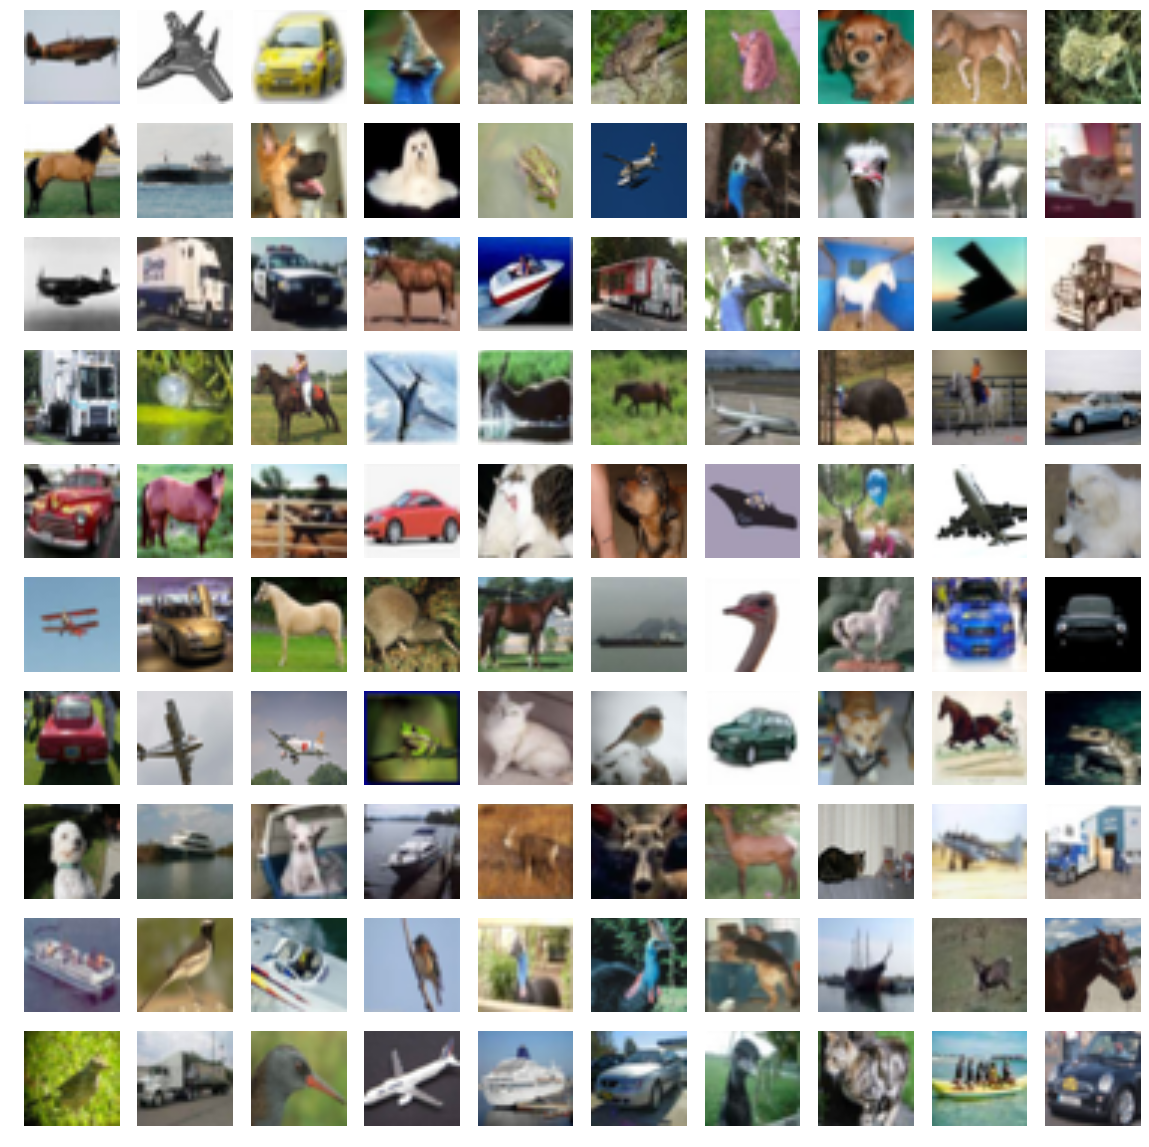

In [27]:
dv.visualize_random(rbf)

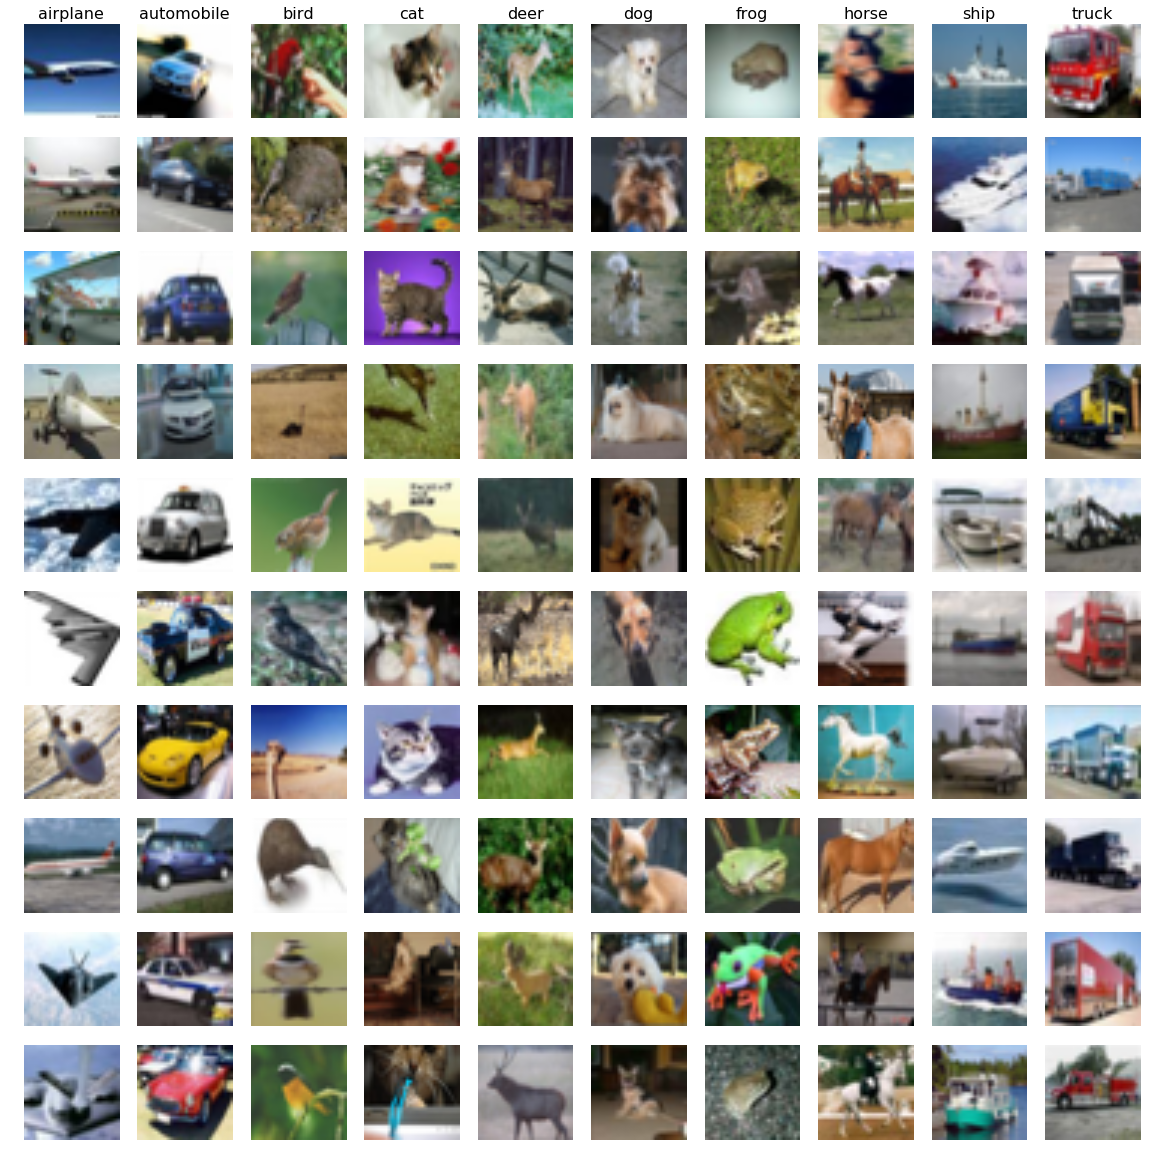

In [28]:
dv.visualize_class(rbf_sorted, classes)

# Create Models

**Standardize X (Features)**

In [14]:
X_scale = pd.DataFrame(scale(X))

### K Nearest Neighbors - Preliminary Visualization to See 10 Nearest Neighbors

**Randomly Select An Image from Each Class**

In [92]:
base = np.random.choice(5000)
print(base)

1947


In [93]:
image_index = [base + 5000*i for i in range(10)]
print(image_index)

[1947, 6947, 11947, 16947, 21947, 26947, 31947, 36947, 41947, 46947]


In [81]:
test = X.iloc[image_index,:]
test.head(n=3)

0     1     2     3     4     5     6     7     8     9     ...   3062  \
2572    107   108   110   111   112   113   115   116   116   116  ...     18   
7572     42    49    43    65    71    44    31    39    35    38  ...     93   
12572    90    81    75    71    69    69    70    70    70    71  ...    155   

       3063  3064  3065  3066  3067  3068  3069  3070  3071  
2572     22    16    16    19    15    17    18    19    14  
7572     94    92    96   102    93    84    80    76    73  
12572   144   135   127   120   111   107   106   116   132  

[3 rows x 3072 columns]

**Hand Selected Image from Each Class**

In [104]:
test = X.iloc[[49, 5441, 10033, 15024, 20130, 40026],:]

In [105]:
test.head()

0     1     2     3     4     5     6     7     8     9     ...   3062  \
49       46    50    53    53    55    56    58    60    61    64  ...    160   
5441    187   183   183   183   176   175   170   160   184   184  ...    204   
10033   215   209   211   212   212   212   212   212   212   212  ...     81   
15024    99   103   103   101    97    95    95    97   102   106  ...     40   
20130    78    73    91    97    79    78    72    72    95    89  ...    153   

       3063  3064  3065  3066  3067  3068  3069  3070  3071  
49      160   160   159   159   158   156   154   152   153  
5441    204   206   209   209   210   211   214   214   215  
10033    79    84    65    75    84    68    66    73    77  
15024    80    74    62    69    70    72    72    72    73  
20130   155   155   154   153   153   152   151   152   155  

[5 rows x 3072 columns]

**Find the 10 Closest Neighbors to Selected Images**

In [106]:
knn_pre = KNearestNeighbors_MK(k=10)

In [107]:
knn_pre.fit(X, y)

In [108]:
predictions = knn_pre.predict(test)
nearest_neighbors = knn_pre.get_nearest_neighbors_index();

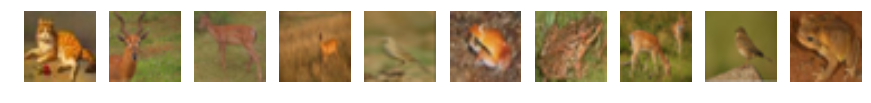

In [121]:
i = 1
plt.figure(figsize=(15,9))
for image in nearest_neighbors[3]:
    plt.subplot(1, 10, i)
    plt.imshow(rbf_sorted[image])
    plt.axis('off')
    i+=1

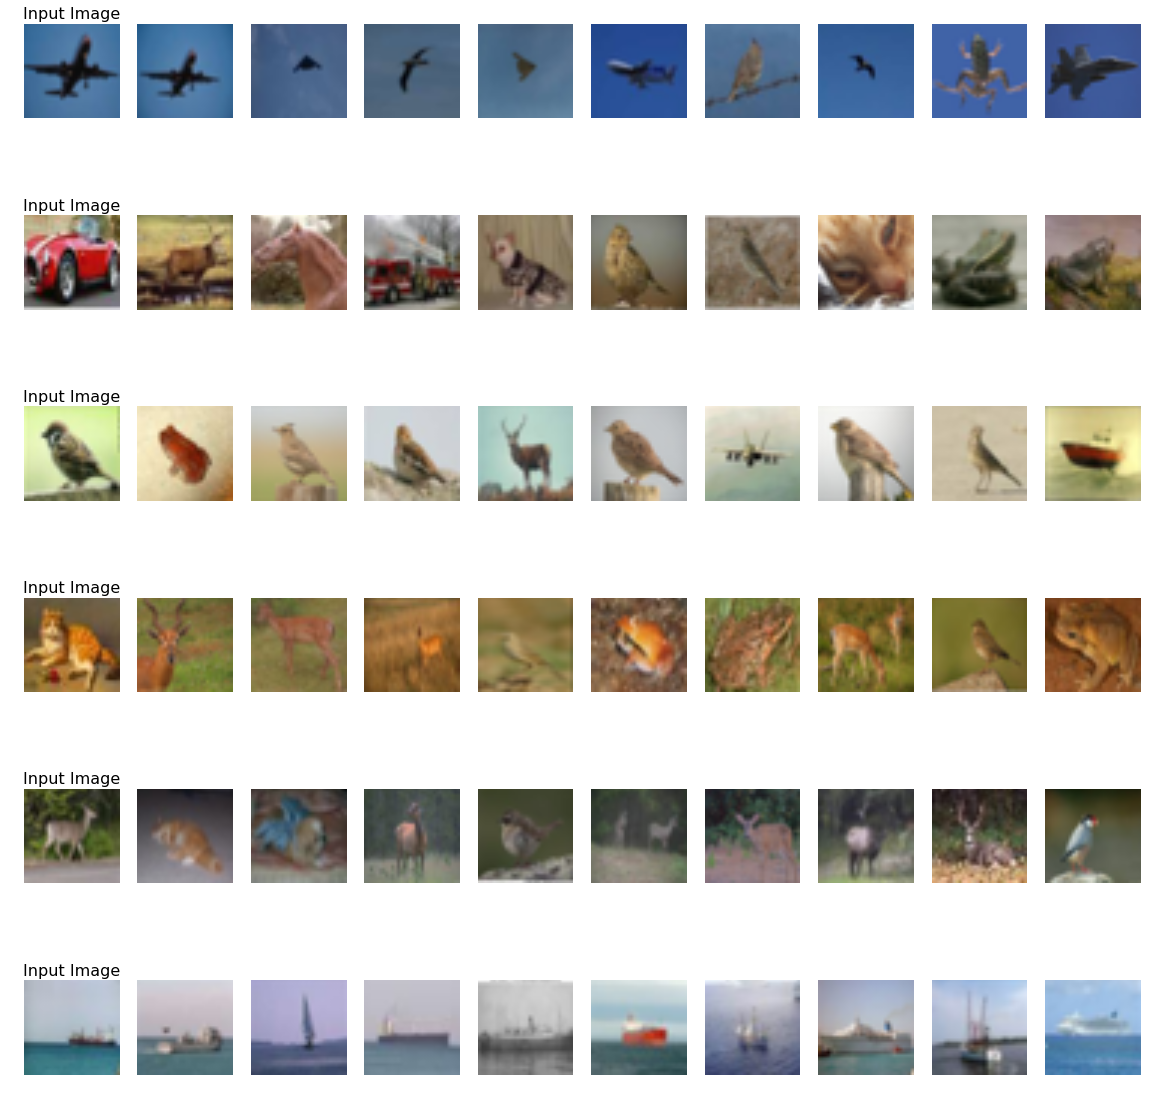

In [109]:
dv.visualize_neighbors(rbf_sorted,nearest_neighbors)

### K Nearest Neighbors - Preliminary Model

**Train Test Split**

Test Size is 0.01 primarily because model takes much longer to run as test size increases

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.02, random_state=2)

**For Preliminary Model Assume k=2**

In [25]:
knn = KNearestNeighbors_MK(k=2)

In [26]:
knn.fit(X_train, y_train)

In [27]:
predictions = knn.predict(X_test)

In [28]:
accuracy = knn.get_accuracy(y_test, predictions)
print('K Nearest Neighbors Accuracy (k=2):', accuracy)

K Nearest Neighbors Accuracy (k=2): 0.323


### K Nearest Neighbors - Tuning Parameter k via Cross Validation

**Create Cross Validation Function for KNN**

In [29]:
def cross_validate_knn(X_train, y_train, num_folds, k_values):
    '''
    Input: 
        X_train - Training Set
        Y_train - Test Set
        num_folds - Number of cross validation folds
        k_values - List of k-values for K Nearest Neighbors
    '''
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    
    X_cv = np.array(np.array_split(X_train, num_folds))
    y_cv = np.array(np.array_split(y_train, num_folds))
    
    k_acc = {}
    for k in k_values:
        for n in range(num_folds):
            # Train/Test Set
            train_index = [x for x in range(num_folds) if x!=n]
            X_ntrain = np.concatenate(X_cv[train_index])
            y_ntrain = np.concatenate(y_cv[train_index])
            X_ntest = X_cv[n]
            y_ntest = y_cv[n]
            # Create Model
            model = KNearestNeighbors_MK(k=k)
            model.fit(X_ntrain, y_ntrain)
            # Predict & Accuracy
            y_npred = model.predict(X_ntest)
            acc = model.get_accuracy(y_ntest, y_npred)
            
            k_acc.setdefault(k,[]).append(acc)
    return k_acc

**Cross Validate on Smaller Set of 10000 Observations from Training Set**

In [92]:
X_train_small = X_train.iloc[:10000,:]
y_train_small = y_train.iloc[:10000]
k_values = [2,3,4,5,6,7,8,9,10,20,30,40,50,75,100]
num_folds = 10

In [93]:
acc = cross_validate_knn(X_train_small, y_train_small, num_folds=num_folds, k_values=k_values)

**Compute Mean & Standard Deviation for Accuracy**

In [94]:
acc_means = [np.mean(accs) for k, accs in sorted(acc.items())]
acc_stds = [np.std(accs) for k, accs in sorted(acc.items())]

**Plot Accuracy vs K-value**

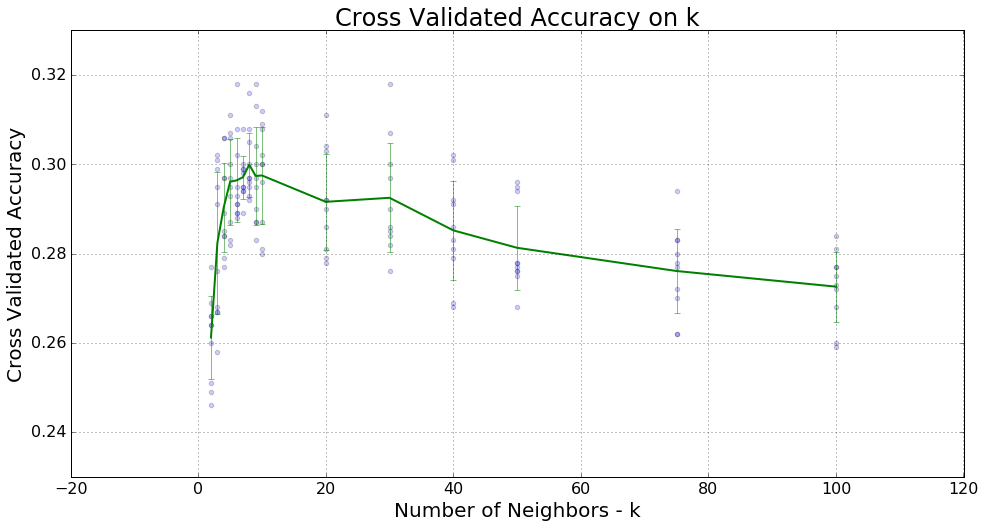

In [99]:
plt.figure(figsize=(16,8))

for k in k_values:
    n_acc = acc[k]
    plt.scatter([k]*num_folds, n_acc,alpha=0.2)
    
plt.errorbar(k_values, acc_means, yerr=acc_stds,color='g',alpha=1,elinewidth=0.5, linewidth=2)
    
# Prettify
plt.xlabel('Number of Neighbors - k', fontsize=20)
plt.ylabel('Cross Validated Accuracy', fontsize=20)
plt.title('Cross Validated Accuracy on k',fontsize=24);
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
plt.grid()

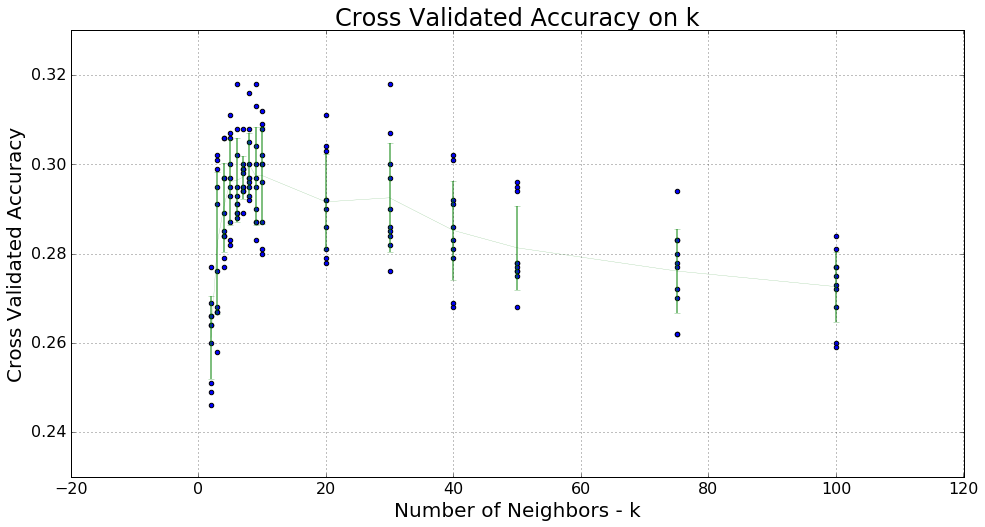

In [98]:
plt.figure(figsize=(16,8))

for k in k_values:
    n_acc = acc[k]
    plt.scatter([k]*num_folds, n_acc,alpha=1)
    
plt.errorbar(k_values, acc_means, yerr=acc_stds,color='g',alpha=0.5, elinewidth=2, linewidth=0.25)
    
# Prettify
plt.xlabel('Number of Neighbors - k', fontsize=20)
plt.ylabel('Cross Validated Accuracy', fontsize=20)
plt.title('Cross Validated Accuracy on k',fontsize=24);
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
plt.grid()

In [35]:
best_k = sorted(list(zip(k_values, acc_means)),key=lambda x:x[1],reverse=True)[0][0]
print('Best Value of k:',best_k)

Best Value of k: 8


### K Nearest Neighbors - Model with Best k Value from Cross Validation

**Train KNN with k=8**

In [44]:
knn = KNearestNeighbors_MK(k=8)

In [45]:
knn.fit(X_train, y_train)

In [46]:
predictions = knn.predict(X_test)

In [47]:
accuracy= knn.get_accuracy(y_test, predictions)
print('K Nearest Neighbors Accuracy with Mklearn (k=8):', accuracy)

K Nearest Neighbors Accuracy with Mklearn (k=8): 0.343


### K Nearest Neighbors - Compare Mklearn Model with Sklearn Model

In [40]:
from sklearn.neighbors import KNeighborsClassifier

**Cross Validate on Smaller Set of 10000 Observations from Training Set**

In [54]:
k_values = [2,3,4,5,6,7,8,9,10]
X_train_smaller = X_train.iloc[:10000,:]
y_train_smaller = y_train.iloc[:10000]

In [55]:
scores = []
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    score = cross_val_score(model, X_train_smaller, y_train_smaller, cv=10)
    scores.append((k,score))

**Compute Mean & Standard Deviation for Accuracy**

In [58]:
acc_means_sk = [np.mean(kacc[1]) for kacc in scores];
acc_stds_sk = [np.std(kacc[1]) for kacc in scores];

In [59]:
best_k_sk = sorted(list(zip(k_values, acc_means_sk)),key=lambda x:x[1],reverse=True)[0][0]
print('Best Value of k:',best_k_sk)

Best Value of k: 8


**Model with Best k Value from Cross Validation**

In [48]:
knn_sk = KNeighborsClassifier(n_neighbors=8,n_jobs=-1)

In [49]:
knn_sk.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
           weights='uniform')

In [50]:
predictions_sk = knn_sk.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
accuracy_sk = accuracy_score(y_test, predictions_sk)
print('K Nearest Neighbors Accuracy with Sklearn (k=8):', accuracy_sk)

K Nearest Neighbors Accuracy with Sklearn (k=8): 0.343


## Save Predictions

In [65]:
pred_df = pd.DataFrame()

In [75]:
pred_df['Indices'] = y_test.index
pred_df['Y True'] = y_test.values
pred_df['Y Pred KNN'] = predictions

In [76]:
# Preview Predictions Dataframe
pred_df.head()

Indices  Y True  Y Pred KNN
0    23656       4           4
1    27442       5           5
2    40162       8           8
3     8459       1           8
4     8051       1           8

In [79]:
pred_df.to_pickle('../data/pickled_predictions/pred_knn.pkl')